# Convolutional Neural Networks

## Using the Pretrained MobileNet V2

we want to get a classification for the image `tram.jpg`

### Step 1: Read an image

In [2]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

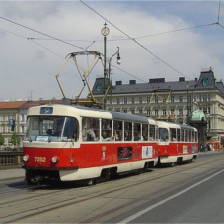

In [3]:
im = image.load_img('tram.jpg', target_size=(224, 224))
im

In [4]:
a = image.img_to_array(im)
a = preprocess_input(a)
a.shape

(224, 224, 3)

**Q: inspect the shape and data type of the numpy array `a` and explain what you see**

### Step 2: Load MobileNetV2

In [8]:
m = MobileNetV2(weights='imagenet', include_top=True)
m.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

**Q: What familiar elements do you see in the summary of the model?**

### Step 3: Prediction

In [15]:
from pprint import pprint

a = a.reshape(1, 224, 224, 3)
p = m.predict(a)
p.shape # probabilities for the 1000 target classes

(1, 1000)

In [18]:
p.sum()

1.0000001

In [17]:
pprint(decode_predictions(p, 10))

[[('n04335435', 'streetcar', 0.95534074),
  ('n04487081', 'trolleybus', 0.0107538365),
  ('n03272562', 'electric_locomotive', 0.0026183387),
  ('n03895866', 'passenger_car', 0.0026057975),
  ('n03874293', 'paddlewheel', 0.0003927448),
  ('n02917067', 'bullet_train', 0.00035161764),
  ('n01755581', 'diamondback', 0.00028048674),
  ('n03947888', 'pirate', 0.00018238674),
  ('n03976657', 'pole', 0.00016886252),
  ('n03133878', 'Crock_Pot', 0.00016484153)]]


**Q: Why do we have to reshape?**

### Step 4: Intermediate output
We can visualize the intermediate output of each CNN layer, too!

In [19]:
from tensorflow.keras import Model

intermediate = Model(inputs=m.input,
                                 outputs=[
                                     m.get_layer(index=2).output,
                                     m.get_layer(index=100).output
                                 ])

cnn2, cnn100 = intermediate.predict(a)
cnn2.shape, cnn100.shape

((1, 112, 112, 32), (1, 14, 14, 576))

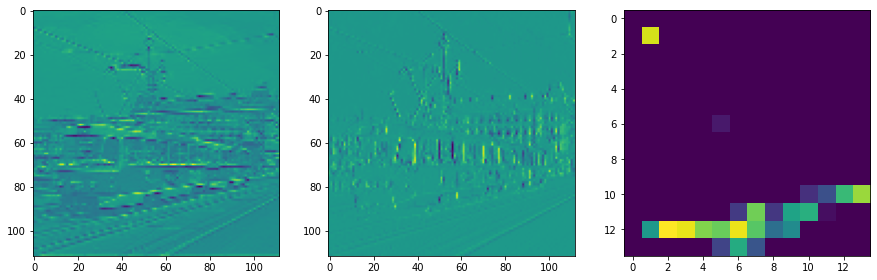

In [20]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cnn2[0,:, :, 0])
plt.subplot(1, 3, 2)
plt.imshow(cnn2[0,:, :, 1])
plt.subplot(1, 3, 3)
plt.imshow(cnn100[0,:, :, 3])

### Step 5: Larger images
Make a prediction for your own image.
Use Pillow to cut out a square shape

In [ ]:
im = image.load_img('...')  # <-- add your file name
im.size

In [ ]:
im2 = im.crop((0, 0, 1000, 1000))  # xstart, ystart, xend, yend
im3 = im2.resize((224, 224))
im3

In [ ]:
# prediction same as before

### Transfer Learning

In [ ]:
# cut off the output layer of the model, so that we get an intermediate output from predict()

In [21]:
m = MobileNetV2(weights='imagenet', input_shape=(224, 224, 3), include_top=False) # <-- FALSE

In [22]:
b = m.predict(a)

In [23]:
b.shape

(1, 7, 7, 1280)

In [24]:
b = b.reshape(1, 7*7*1280)
b.shape

(1, 62720)

In [ ]:
# continuation: do this for an entire training dataset and use the result as input for another model
# alternative: add extra layers (see the other notebook for an example)

#### Warning:
The headless CNN has a lot of features and is very likely to overfit even with a lot of data. You absolutely will have to use some kind of dimensionality reduction and/or regularization and carefully validate.